In [1]:
import pandas as pd #for analyzing panel data
import os #used to shorten filepaths
import geopandas as gpd # for handling GIS data and 
from shapely.geometry import Point, Polygon #for adding Shapefiles for geographic data
import matplotlib.pyplot as plt

In [2]:
here = os.getcwd()

In [3]:
Nigeria_Counties = here + "\\NigeriaShape\\NIR.shx" 
#shapefile for States and Local Government Areas

In [61]:
HouseData = here + "\\NigeriaHousehold\\sect4b_plantingw3.csv"
NigeriaPhones = pd.read_csv(HouseData)

In [62]:
NigeriaPhones.head()

,zone,state,lga,sector,ea,hhid,indiv,s4bq1,s4bq8,s4bq9,...,s4bq10h,s4bq14,s4bq15,s4bq15b,s4bq15a1,s4bq15a1_os,s4bq15a2,s4bq15a2_os,s4bq15a3,s4bq15a3_os
0,4,1,115,1,670,10001,1,1,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,115,1,670,10001,2,1,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,115,1,670,10001,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,115,1,670,10001,4,1,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,115,1,670,10001,8,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Household Survey Data

In [63]:
NigeriaPhones.rename(columns = {'s4bq1':'>10?',
                                's4bq8':'phone',
                                's4bq10':'#phones',
                                's4bq10b':'banking',
                                's4bq10c':'mobile banking',
                                's4bq10d':'mobile transfer',
                                's4bq10g':'how often',
                                's4bq14':'internet access',
                                's4bq15':'internet source',
                                's4bq15a1':'internet usage',
                                's4bq15a3':'internet usage 2',
                               }, inplace = True)

In [64]:
NigeriaPhones.drop(['s4bq9','s4bq10e','s4bq10f','s4bq10g_os','s4bq10h','s4bq15b','s4bq15a1_os','s4bq15a2','s4bq15a2_os',
                    's4bq15a3_os'], axis = 1, inplace = True)

In [65]:
NigeriaPhones.state.replace({1:'Abia',
                               2:'Adamawa',
                               3:'Akwa Ibom',
                               4:'Anambra',
                            5:'Bauchi',
                              6:'Bayelsa',
                              7:'Benue',
                               8:'Borno',
                               9:'Cross River',
                               10:'Delta',
                               11:'Ebonyi',
                               12:'Edo',
                               13:'Ekiti',
                               14:'Enugu',
                               15:'Gombe',
                               16:'Imo',
                               17:'Jigawa',
                               18:'Kaduna',
                               19:'Kano',
                               20:'Katsina',
                               21:'Kebbi',
                               22:'Kogi',
                               23:'Kwara',
                               24:'Lagos',
                               25:'Nasarawa',
                               26:'Niger',
                               27:'Ogun',
                               28:'Ondo',
                               29:'Osun',
                               30:'Oyo',
                               31:'Plateau',
                               32:'Rivers',
                               33:'Sokoto',
                               34:'Taraba',
                               35:'Yobe',
                               36:'Zamfara',
                               37:'Abuja'
                              }, inplace = True)

In [66]:
NigeriaPhones.zone.replace({1:'North Central',
                            2:'North East',
                           3: 'North West',
                           4: 'South East',
                           5: 'South South',
                           6: 'South West'},
                          inplace = True)

In [70]:
NigeriaPhones

,zone,state,lga,sector,ea,hhid,indiv,>10?,phone,#phones,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2
0,South East,Abia,115,1,670,10001,1,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,South East,Abia,115,1,670,10001,2,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,South East,Abia,115,1,670,10001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South East,Abia,115,1,670,10001,4,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,South East,Abia,115,1,670,10001,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,South East,Abia,115,1,670,10002,1,1,1.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,7.0
6,South East,Abia,115,1,670,10002,2,1,1.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0,7.0,3.0
7,South East,Abia,115,1,670,10002,3,1,1.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,6.0
8,South East,Abia,115,1,670,10002,4,1,1.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,4.0,1.0
9,South East,Abia,115,1,670,10002,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
lgacode = pd.read_excel(here + '\\lgacodes.xlsx') #excel file I used to map LGA codes to their names,
                                                  #useful for plotting
    
    

In [34]:
lgacode.head(3)

,Code,LGA
0,101,ABA NORTH
1,102,ABA SOUTH
2,103,AROCHUKWU


In [32]:
newdict = {}

In [58]:
print(lgacode.shape[0])
print(NigeriaPhones.shape[0])

774
26871


In [43]:
lgadict = lgacode.to_dict('split')

In [44]:
lgadict

{'index': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  

In [72]:
print(NigeriaPhones)

                zone  state   lga  sector   ea    hhid  indiv  >10?  phone  \
0         South East   Abia   115       1  670   10001      1     1    1.0   
1         South East   Abia   115       1  670   10001      2     1    1.0   
2         South East   Abia   115       1  670   10001      3     2    NaN   
3         South East   Abia   115       1  670   10001      4     1    1.0   
4         South East   Abia   115       1  670   10001      8     2    NaN   
5         South East   Abia   115       1  670   10002      1     1    1.0   
6         South East   Abia   115       1  670   10002      2     1    1.0   
7         South East   Abia   115       1  670   10002      3     1    1.0   
8         South East   Abia   115       1  670   10002      4     1    1.0   
9         South East   Abia   115       1  670   10002      8     2    NaN   
10        South East   Abia   115       1  670   10002      9     2    NaN   
11        South East   Abia   115       1  670   10003      1   

In [75]:
#print(lgacode)

In [81]:

for i in range(lgacode.shape[0]):
    NigeriaPhones.lga.replace(lgacode['Code'].iloc[i],""+lgacode['LGA'][i],inplace = True)

NigeriaPhones.head()

,zone,state,lga,sector,ea,hhid,indiv,>10?,phone,#phones,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2
0,South East,Abia,UMUAHIA NORTH,1,670,10001,1,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,South East,Abia,UMUAHIA NORTH,1,670,10001,2,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,South East,Abia,UMUAHIA NORTH,1,670,10001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South East,Abia,UMUAHIA NORTH,1,670,10001,4,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,South East,Abia,UMUAHIA NORTH,1,670,10001,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#NigeriaPhones.tail(20)

In [100]:
#NigeriaPhones.lga.str.lower()

In [147]:
len(NigeriaPhones.lga.unique())

434

In [85]:
NigeriaPhones.head()

,zone,state,lga,sector,ea,hhid,indiv,>10?,phone,#phones,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2
0,South East,Abia,UMUAHIA NORTH,1,670,10001,1,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,South East,Abia,UMUAHIA NORTH,1,670,10001,2,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,South East,Abia,UMUAHIA NORTH,1,670,10001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South East,Abia,UMUAHIA NORTH,1,670,10001,4,1,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,South East,Abia,UMUAHIA NORTH,1,670,10001,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preparing Shapefile

In [10]:
Nigeria_map = gpd.read_file(Nigeria_Counties)

In [139]:
#Nigeria_map.head(20)

In [88]:
Nigeria_map.ADM2 = Nigeria_map.ADM2.str.upper()

In [92]:
Nigeria_map.rename(columns = {"ADM2":"lga"},  inplace = True)

In [93]:
Nigeria_map.tail()

,ID,LBL,FIP,MMT_ID,SHORT__FRM,LONG_FRM,ADM0,ADM1,lga,ADM3,ADM4,ADM5,STL-0,STL-1,STL-2,STL-3,STL-4,STL-5,geometry
545,546,NIR-546,NI,NIR,Nigeria,Federal Republic of Nigeria,Nigeria,Zamfara,KAURA-NA,-,-,-,168,36,544,-,-,-,"POLYGON ((13.31681999999273 10.11045999999624,..."
546,547,NIR-547,NI,NIR,Nigeria,Federal Republic of Nigeria,Nigeria,Zamfara,MARADUN,-,-,-,168,36,543,-,-,-,"POLYGON ((11.71550999999454 7.035250000000815,..."
547,548,NIR-548,NI,NIR,Nigeria,Federal Republic of Nigeria,Nigeria,Zamfara,TALATAR,-,-,-,168,36,546,-,-,-,"POLYGON ((7.650000095367432 12.40999984741211,..."
548,549,NIR-549,NI,NIR,Nigeria,Federal Republic of Nigeria,Nigeria,Zamfara,TSAFE,-,-,-,168,36,545,-,-,-,"POLYGON ((7.960000038146973 12.56999969482422,..."
549,550,NIR-550,NI,NIR,Nigeria,Federal Republic of Nigeria,Nigeria,Zamfara,ZURMI,-,-,-,168,36,541,-,-,-,"POLYGON ((3.159999999999854 7.360000000000582,..."


In [104]:
Nigeria_map.drop(['STL-3','ID','LBL','FIP','MMT_ID','SHORT__FRM','LONG_FRM'], axis = 1, inplace = True)

In [76]:
Nigeria_map.shape

(550, 12)

In [145]:
Nigeria_map.lga.unique()

array(['ABA', 'AROCHUKW', 'BENDE', 'IKWUANO', 'ISIALA-N', 'OBIOMA-N',
       'OHAFIA ABIA', 'UKWA', 'UKWAEAST', 'UMUAHIA', 'FUFORE', 'GANYE',
       'GOMBI', 'GUYUK', 'HONG', 'JADA', 'MADAGALI', 'MAIHA', 'MAYO-BEL',
       'MICHIKA', 'MUBI', 'NUMAN', 'SHELLENG', 'SONG', 'YOLA', 'ABAK',
       'EKET', 'EKPE-ATA', 'ESSIEN-U', 'ETIMEKPO', 'ETINAN', 'IKONO',
       'IKOT-ABA', 'IKOT-EKP', 'INI', 'ITU', 'MBO', 'MKPAT-EN',
       'NSIT-IBO', 'NSIT-UBI', 'OKOBO', 'ONNA', 'ORON', 'ORUK-ANA',
       'UKANAFUN', 'UQUOIBEN', 'URUAN', 'URUEOFFO', 'UYO', 'AGUATA',
       'ANAMBRA', 'ANAOCHA', 'AWKANORT', 'AWKASOUT', 'IDEMILI', 'IHIALA',
       'NJIKOKA', 'NNEWINORT', 'NNEWISOU', 'OGBARU', 'ONITSHAN',
       'ORUMBANO', 'ORUMBASO', 'OYI', 'ALKALERI', 'BAUCHI', 'DARAZO',
       'DASS', 'GAMAWA', 'GAMJUWA', 'ITAS/GAD', "JAMA'ARE", 'KATAGUM',
       'MISAU', 'NINGI', 'SHIRA', 'TAFAWA-B', 'TORO', 'ZAKI', 'BRASS',
       'EKEREMOR', 'NORTHERN', 'SAGBAMA', 'SOUTHERNIJAW', 'ADO', 'APA',
       'BURUKU', 'G

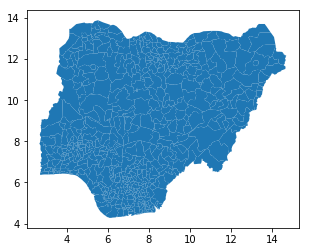

In [42]:
Nigeria_map.plot()

# Merging Data DF with Map DF

In [106]:
Nigeria_map1 = Nigeria_map.merge(NigeriaPhones, on = 'lga', how = 'left', indicator = True)

In [107]:
Nigeria_map1

,ADM0,ADM1,lga,geometry,zone,state,sector,ea,hhid,indiv,...,#phones,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2,_merge
0,Nigeria,Abia,ABA,"POLYGON ((2.751309999999648 6.906810000000405,...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,Nigeria,Abia,AROCHUKW,"POLYGON ((2.959999999999127 7.730000000003201,...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10011.0,1.0,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both
3,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10011.0,2.0,...,1.0,2.0,NaN,NaN,NaN,1.0,5.0,1.0,6.0,both
4,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10011.0,3.0,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both
5,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10011.0,4.0,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both
6,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10011.0,5.0,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both
7,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10011.0,6.0,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both
8,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10012.0,2.0,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both
9,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,Abia,2.0,1364.0,10012.0,3.0,...,1.0,1.0,2.0,2.0,4.0,1.0,5.0,4.0,1.0,both


In [137]:
lgalist = Nigeria_map1.lga.unique()
lgalist

array(['ABA', 'AROCHUKW', 'BENDE', 'IKWUANO', 'ISIALA-N', 'OBIOMA-N',
       'OHAFIA ABIA', 'UKWA', 'UKWAEAST', 'UMUAHIA', 'FUFORE', 'GANYE',
       'GOMBI', 'GUYUK', 'HONG', 'JADA', 'MADAGALI', 'MAIHA', 'MAYO-BEL',
       'MICHIKA', 'MUBI', 'NUMAN', 'SHELLENG', 'SONG', 'YOLA', 'ABAK',
       'EKET', 'EKPE-ATA', 'ESSIEN-U', 'ETIMEKPO', 'ETINAN', 'IKONO',
       'IKOT-ABA', 'IKOT-EKP', 'INI', 'ITU', 'MBO', 'MKPAT-EN',
       'NSIT-IBO', 'NSIT-UBI', 'OKOBO', 'ONNA', 'ORON', 'ORUK-ANA',
       'UKANAFUN', 'UQUOIBEN', 'URUAN', 'URUEOFFO', 'UYO', 'AGUATA',
       'ANAMBRA', 'ANAOCHA', 'AWKANORT', 'AWKASOUT', 'IDEMILI', 'IHIALA',
       'NJIKOKA', 'NNEWINORT', 'NNEWISOU', 'OGBARU', 'ONITSHAN',
       'ORUMBANO', 'ORUMBASO', 'OYI', 'ALKALERI', 'BAUCHI', 'DARAZO',
       'DASS', 'GAMAWA', 'GAMJUWA', 'ITAS/GAD', "JAMA'ARE", 'KATAGUM',
       'MISAU', 'NINGI', 'SHIRA', 'TAFAWA-B', 'TORO', 'ZAKI', 'BRASS',
       'EKEREMOR', 'NORTHERN', 'SAGBAMA', 'SOUTHERNIJAW', 'ADO', 'APA',
       'BURUKU', 'G

In [113]:
#Nigeria_map1['#phones','banking','mobile banking','mobile transfer','how often','internet access','internet source','internet usage','internet usage 2'].replace(NaN,0.0,inplace = True)

In [116]:
Nigeria_map1_fix = Nigeria_map1[Nigeria_map1['_merge'] == 'both'] #the data sets were inconsistent on the LGA county names, this only includes names of towns present on the original GDF

In [148]:
lgalist = Nigeria_map1_fix.lga.unique() #only 187 LGAs were in the Survey were consistently named between the data sources

### Now that the Dataframes are merged, I wil aggregate the individual and household responses to the lga level, so the metrics i'm trying to show are easily represented

In [119]:
Nigeria_map2 = Nigeria_map1_fix.groupby("lga")

In [131]:
len(check)

187

In [ ]:
check = []

In [149]:
scores1 = {}
for x in lgalist:
    
    lgagroup = Nigeria_map2.get_group(x)
    scores = lgagroup['Score']
    average = np.mean(scores)
    scores1[x] = average
print(scores1)

{'BENDE': 4.479166666666667, 'IKWUANO': 3.3658536585365852, 'GANYE': 2.7058823529411766, 'GOMBI': 2.629032258064516, 'HONG': 3.1805555555555554, 'MADAGALI': 2.4166666666666665, 'NUMAN': 2.8840579710144927, 'SONG': 2.0, 'ABAK': 4.72093023255814, 'INI': 8.75, 'MBO': 4.166666666666667, 'OKOBO': 4.558139534883721, 'URUAN': 3.6551724137931036, 'UYO': 4.883333333333334, 'AGUATA': 3.2524271844660193, 'IHIALA': 3.146551724137931, 'NJIKOKA': 3.5084745762711864, 'OGBARU': 2.972972972972973, 'OYI': 3.5121951219512195, 'ALKALERI': 2.4375, 'BAUCHI': 2.3780487804878048, 'DASS': 2.7837837837837838, 'MISAU': 3.2994011976047903, 'NINGI': 1.6888888888888889, 'SHIRA': 2.76271186440678, 'TORO': 2.238095238095238, 'ZAKI': 2.5454545454545454, 'BRASS': 3.4565217391304346, 'EKEREMOR': 2.7, 'SAGBAMA': 3.5714285714285716, 'BURUKU': 2.875, 'GBOKO': 3.103448275862069, 'KWANDE': 2.2857142857142856, 'MAKURDI': 3.107142857142857, 'OGBADIBO': 3.4285714285714284, 'OHAUKWU': 3.060344827586207, 'OJU': 3.657142857142857,

In [82]:
Nigeria_map2.head()

,ADM0,ADM1,lga,geometry,zone,indiv,>10?,phone,#phones,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2,Score
2,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,1.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4
3,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,2.0,1.0,1.0,7.0,2.0,NaN,NaN,NaN,1.0,5.0,1.0,6.0,7
4,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,3.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4
5,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,4.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4
6,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,5.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4
50,Nigeria,Abia,IKWUANO,"POLYGON ((6.849343776702881 13.08229064941406,...",South East,1.0,1.0,1.0,9.0,1.0,2.0,2.0,4.0,1.0,1.0,1.0,NaN,9
51,Nigeria,Abia,IKWUANO,"POLYGON ((6.849343776702881 13.08229064941406,...",South East,2.0,1.0,1.0,9.0,1.0,2.0,2.0,4.0,1.0,1.0,1.0,NaN,9
52,Nigeria,Abia,IKWUANO,"POLYGON ((6.849343776702881 13.08229064941406,...",South East,3.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
53,Nigeria,Abia,IKWUANO,"POLYGON ((6.849343776702881 13.08229064941406,...",South East,5.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
54,Nigeria,Abia,IKWUANO,"POLYGON ((6.849343776702881 13.08229064941406,...",South East,6.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4


Here I realized that the values of the survey responses represent a specific type of response, I'll make a new column that aggregates the responses into a pseudo index called 'score', where every response will equal 1, and the score will be the total number of responses per response, not economically sound way of doing this, but after submission, I'll work on making this more statistically accurate, for now i just want a rough picture

In [56]:
cols = Nigeria_map1_fix.iloc[0:10,19:29]
cols

,phone,#phones,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2
2,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,1.0,7.0,2.0,NaN,NaN,NaN,1.0,5.0,1.0,6.0
4,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
6,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
7,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
8,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
9,1.0,10.0,1.0,2.0,2.0,4.0,1.0,5.0,4.0,1.0
10,1.0,10.0,1.0,2.0,2.0,4.0,1.0,5.0,1.0,2.0
11,1.0,10.0,1.0,2.0,2.0,4.0,1.0,5.0,4.0,3.0


In [57]:
import numpy as np

In [67]:
Nigeria_map1_fix['Score'] = np.nan
newcols = []
for i in range(Nigeria_map1_fix.shape[0]):
    count = 0
    cols = Nigeria_map1_fix.iloc[i,19:29]
    for x in cols:
        if x > 0:
            count+=1
    newcols.append(count)  
        
Nigeria_map1_fix['Score']=newcols

C:\Users\jmjoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmjoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [68]:
Nigeria_map1_fix

,ADM0,ADM1,lga,ADM3,ADM4,ADM5,STL-0,STL-1,STL-2,STL-4,...,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2,_merge,Score
2,Nigeria,Abia,BENDE,-,-,-,168,1,1,-,...,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both,4
3,Nigeria,Abia,BENDE,-,-,-,168,1,1,-,...,2.0,NaN,NaN,NaN,1.0,5.0,1.0,6.0,both,7
4,Nigeria,Abia,BENDE,-,-,-,168,1,1,-,...,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both,4
5,Nigeria,Abia,BENDE,-,-,-,168,1,1,-,...,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both,4
6,Nigeria,Abia,BENDE,-,-,-,168,1,1,-,...,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,both,4


In [71]:
Nigeria_map1_fix.drop(['ADM3','ADM4','ADM5','STL-0','STL-1','STL-2','STL-4','_merge'],axis = 1, inplace =True)

C:\Users\jmjoh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
Nigeria_map1_fix.drop(['STL-5','state','sector','ea','hhid'],axis = 1, inplace = True)

In [74]:
Nigeria_map1_fix.head()

,ADM0,ADM1,lga,geometry,zone,indiv,>10?,phone,#phones,banking,mobile banking,mobile transfer,how often,internet access,internet source,internet usage,internet usage 2,Score
2,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,1.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4
3,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,2.0,1.0,1.0,7.0,2.0,NaN,NaN,NaN,1.0,5.0,1.0,6.0,7
4,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,3.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4
5,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,4.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4
6,Nigeria,Abia,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",South East,5.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4


In [123]:
type(Nigeria_map1_fix['geometry'])

geopandas.geoseries.GeoSeries

#### How do I aggregate by lga without upsetting geometry column

in mapping?


In [122]:
newDict  = dict(zip(Nigeria_map1_fix["lga"],Nigeria_map1_fix['geometry']))
newDict

{'BENDE': <shapely.geometry.polygon.Polygon at 0x24ce77e7d30>,
 'IKWUANO': <shapely.geometry.polygon.Polygon at 0x24ce77ec2b0>,
 'GANYE': <shapely.geometry.polygon.Polygon at 0x24ce77dd198>,
 'GOMBI': <shapely.geometry.polygon.Polygon at 0x24ce77dd6d8>,
 'HONG': <shapely.geometry.polygon.Polygon at 0x24ce77e9198>,
 'MADAGALI': <shapely.geometry.polygon.Polygon at 0x24ce77e9be0>,
 'NUMAN': <shapely.geometry.polygon.Polygon at 0x24ce77d8668>,
 'SONG': <shapely.geometry.polygon.Polygon at 0x24ce77e00f0>,
 'ABAK': <shapely.geometry.polygon.Polygon at 0x24ce77e0b38>,
 'INI': <shapely.geometry.polygon.Polygon at 0x24ce7879828>,
 'MBO': <shapely.geometry.polygon.Polygon at 0x24ce7874780>,
 'OKOBO': <shapely.geometry.polygon.Polygon at 0x24ce789eb38>,
 'URUAN': <shapely.geometry.polygon.Polygon at 0x24ce77dce48>,
 'UYO': <shapely.geometry.polygon.Polygon at 0x24ce78a1860>,
 'AGUATA': <shapely.geometry.polygon.Polygon at 0x24ce78a1da0>,
 'IHIALA': <shapely.geometry.polygon.Polygon at 0x24ce7898

In [154]:
final_df = pd.DataFrame(list(newDict.items()), columns = ['lga','geometry'])
final_df['Scores'] = scores1.values()
final_df

,lga,geometry,Scores
0,BENDE,"POLYGON ((3.279999999998836 7.069999999999709,...",4.479167
1,IKWUANO,"POLYGON ((6.849343776702881 13.08229064941406,...",3.365854
2,GANYE,"POLYGON ((4.129106044769287 13.23579025268555,...",2.705882
3,GOMBI,"POLYGON ((6.299067974090576 13.66119956970215,...",2.629032
4,HONG,"POLYGON ((10.18986129760742 13.26098728179932,...",3.180556
5,MADAGALI,"POLYGON ((11.26132965087891 13.37434673309326,...",2.416667
6,NUMAN,"POLYGON ((4.710000038146973 10.6899995803833, ...",2.884058
7,SONG,"POLYGON ((4.710000038146973 10.6899995803833, ...",2.000000
8,ABAK,"POLYGON ((5.130000114440918 10.82999992370605,...",4.720930
9,INI,"POLYGON ((5.300000190734863 9.539999961853027,...",8.750000


In [156]:
final_geo = gpd.GeoDataFrame(final_df)

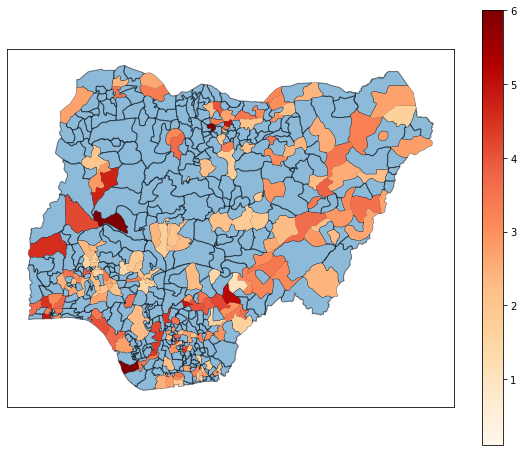

In [162]:
fig, ax = plt.subplots(figsize = (10,8))
Nigeria_map.plot(ax=ax, edgecolor = 'k', alpha = .5)
final_geo.plot(ax=ax, column = 'Scores', cmap = 'OrRd',legend = True, vmin = 0.1,vmax = 6 )
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)